# Notebook to classifier good weather days based off TSI data

inputs:
   1. telemetry files (week long logs)
    * neid_ljpyrohelio_chv0_yyyymmdd.tel
   2. Classifier model (pickle file)
    * model = pickle.load(open("model.pkl", "rb"))

outputs:
   1. list of classifed data points
    * dates list with corresponding weather label
   2. plots of good and bad weather days
    * plots compare weather cuts with ideal model


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import source.pyr_funcs as pf

## Read in files and parse data

In [2]:
# read in files
dir_path = "fill in path to directory with telemetry files"
dir_path = "/Users/tervin/pyr_classifier/pyr_data"
files = os.listdir(dir_path)
files = sorted(files)

# parse files
days, full_flux, noon_flux = pf.parse_files(files, dir_path)

## Build model for ideal days

In [3]:
# default location parameters - NEID spectrometer (Kitt Peak, Tuscon AZ)
lat = 32.2
lon = -111
tz = 'US/Arizona'
elevation=735
name='Tucson'

# create TSI model
full_model, noon_model = pf.tsi_model(days, full_flux, lat, lon, tz, elevation, name)

## Calculate statistical parameters for flux data

In [4]:
stats_params = pf.stat_parameters(days, full_flux, noon_flux, full_model, noon_model)

## Label dates

In [5]:
model_path = "/Users/tervin/pyr_classifier/model2.pkl"
csv_name = 'labels2.csv'
date_labels = pf.classify_days(days, stats_params, model_path, csv_name)

## Plot with label

/Users/tervin/opt/anaconda3/envs/pyr_classifier/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


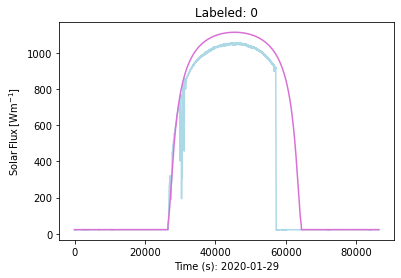

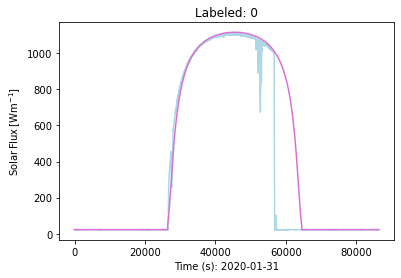

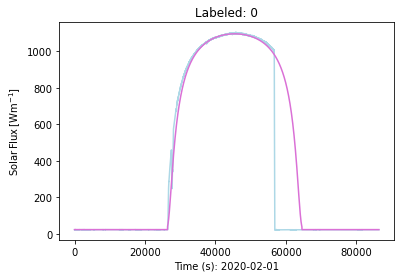

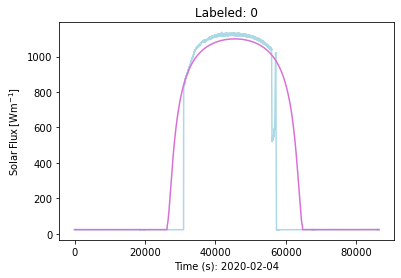

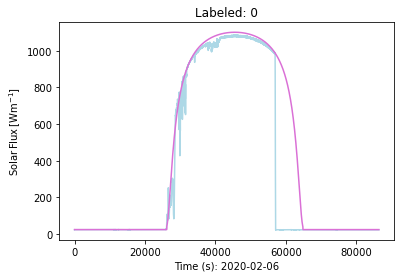

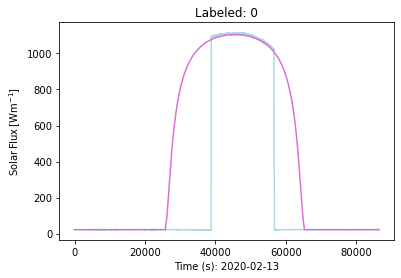

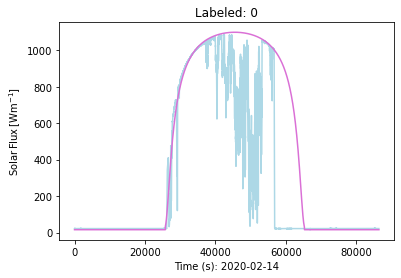

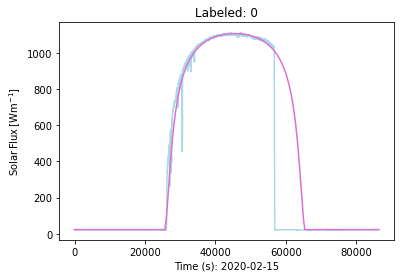

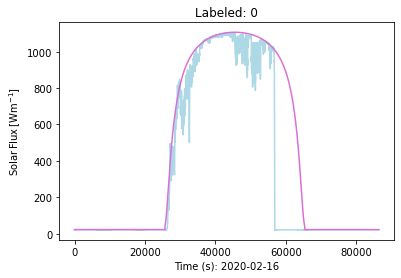

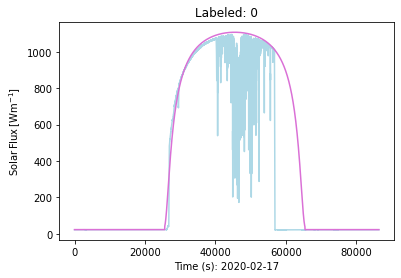

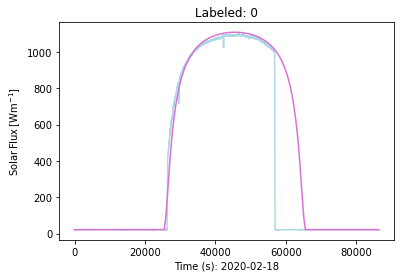

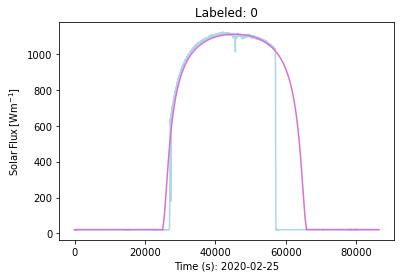

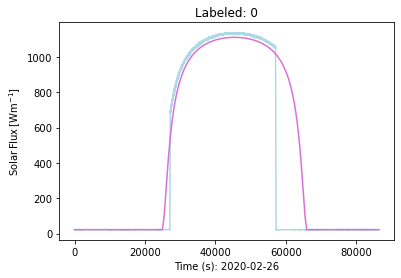

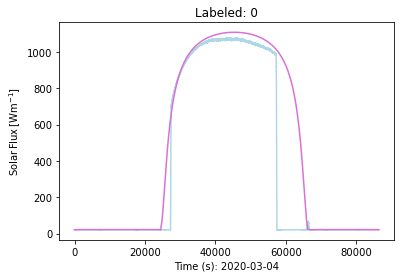

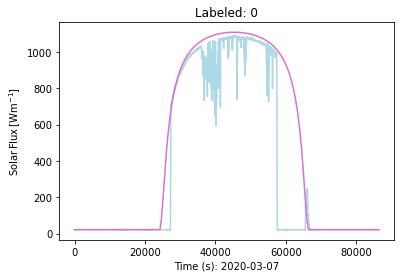

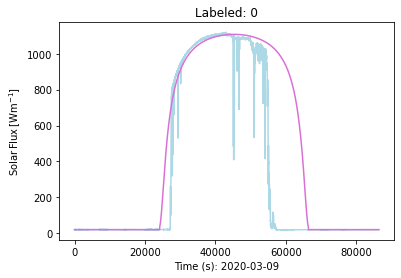

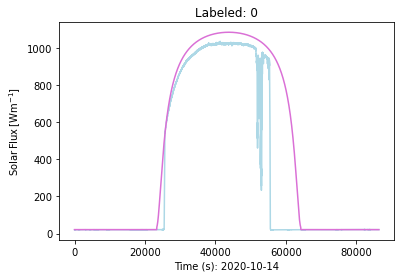

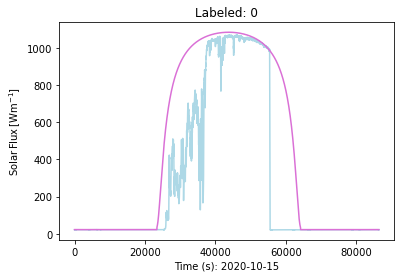

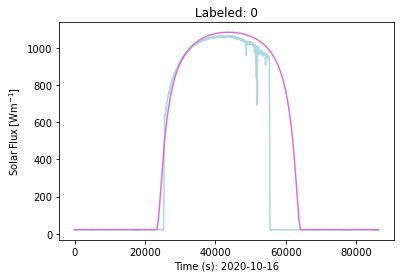

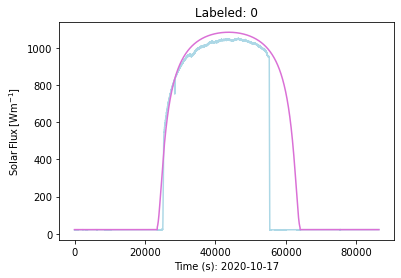

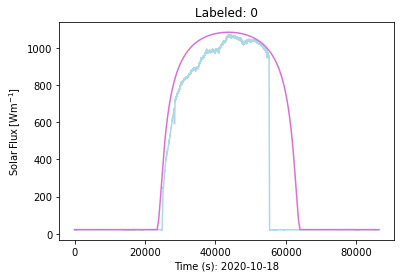

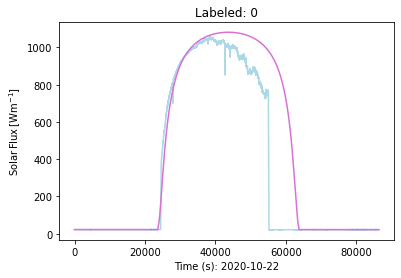

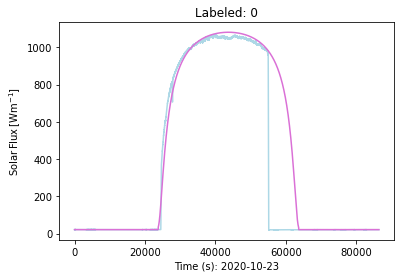

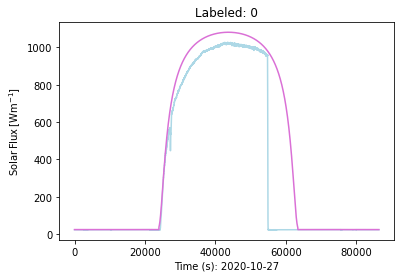

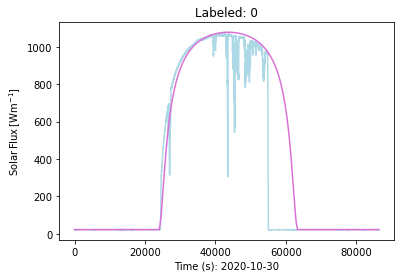

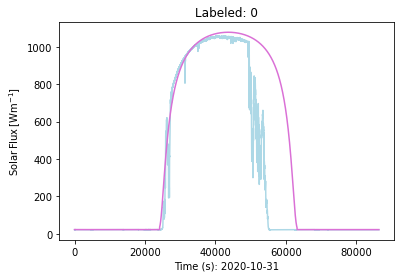

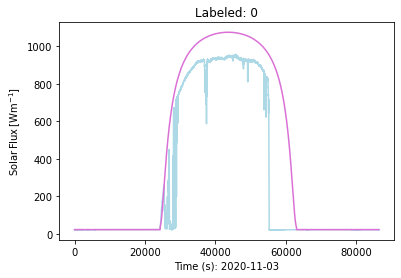

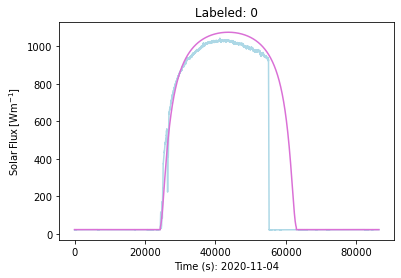

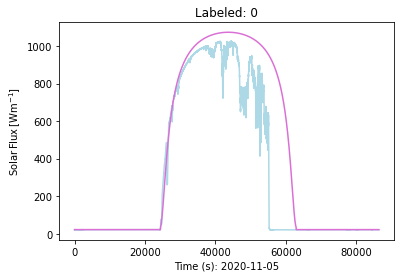

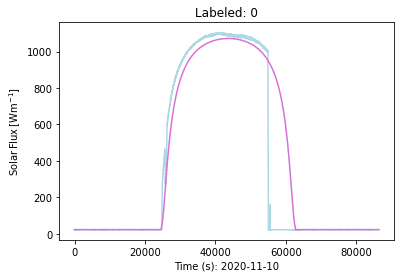

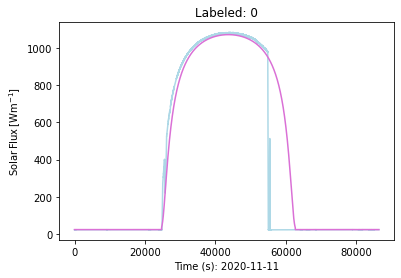

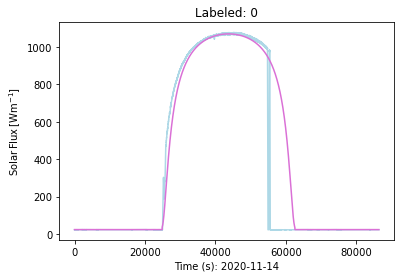

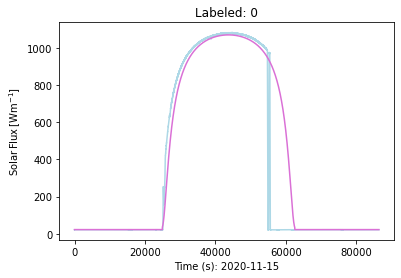

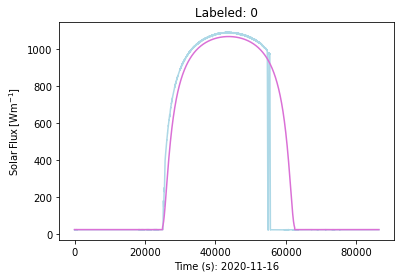

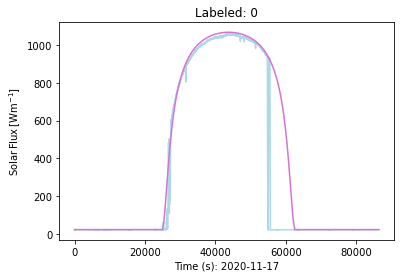

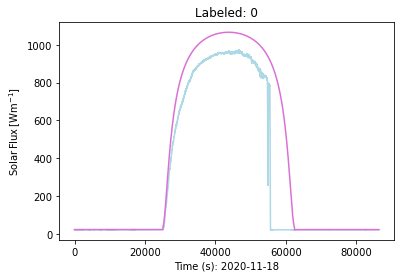

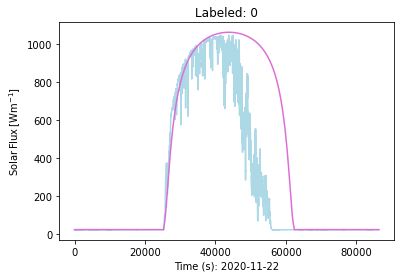

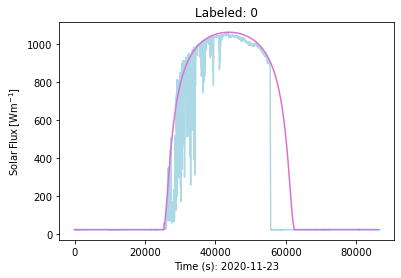

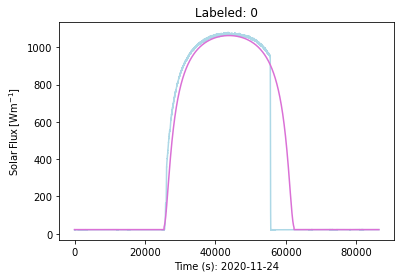

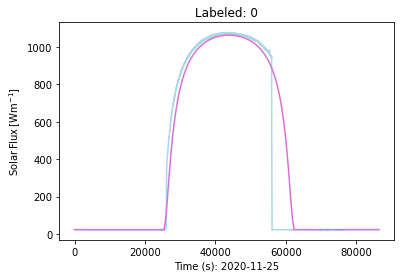

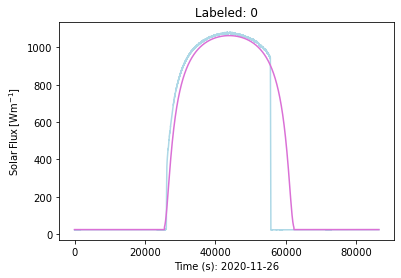

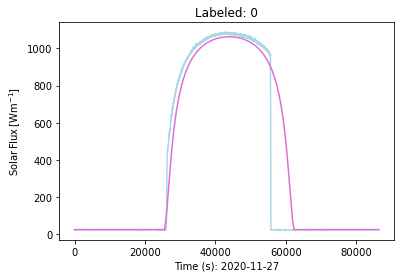

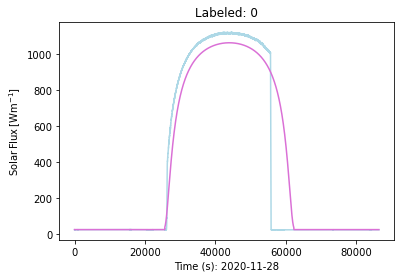

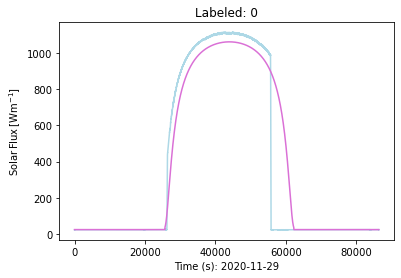

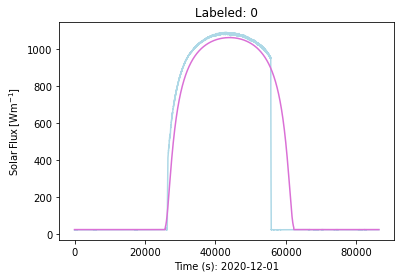

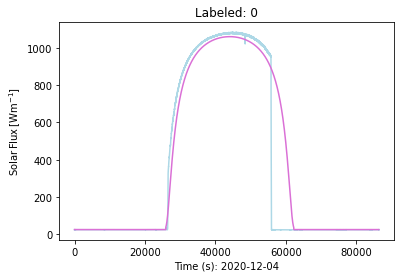

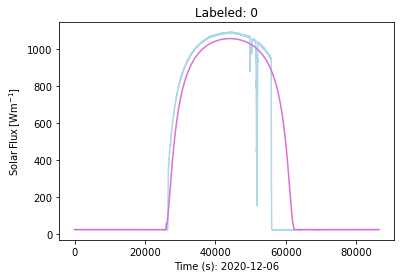

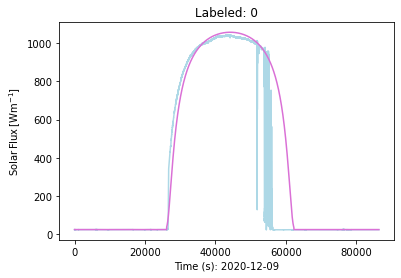

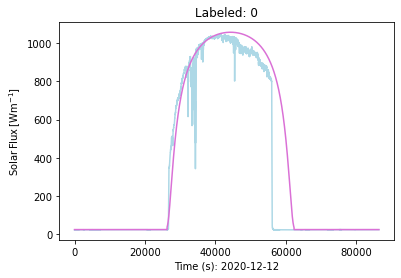

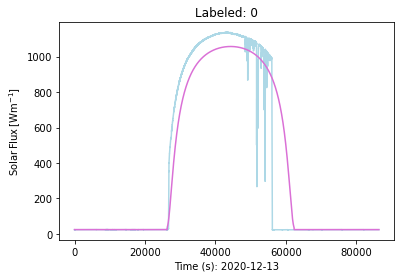

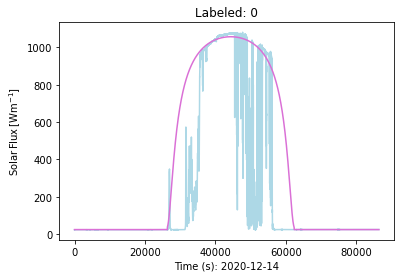

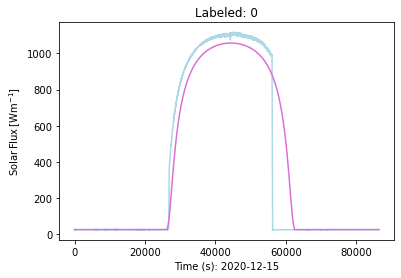

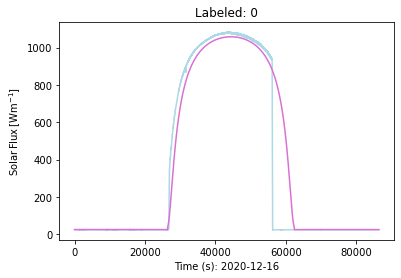

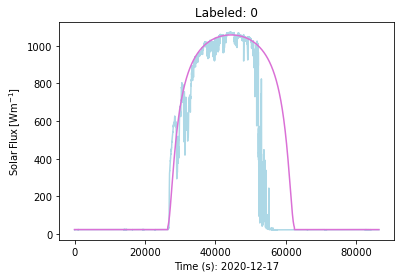

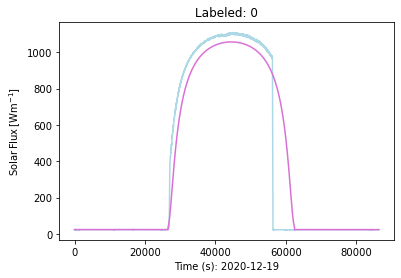

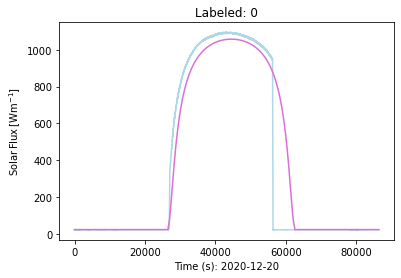

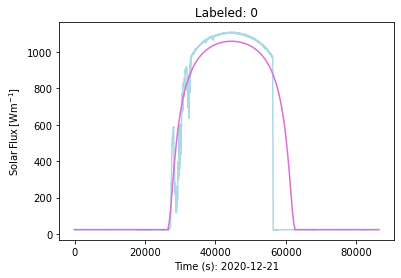

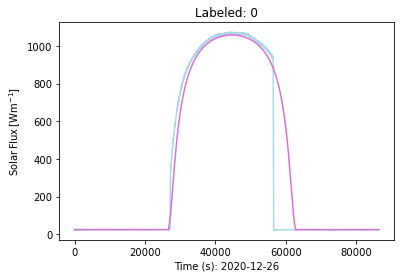

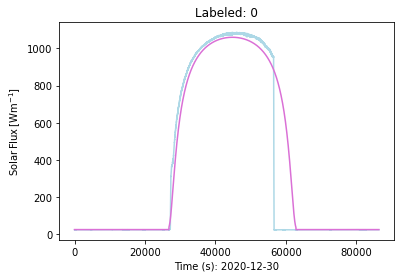

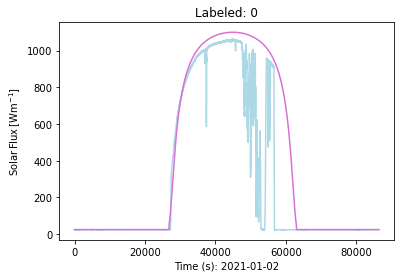

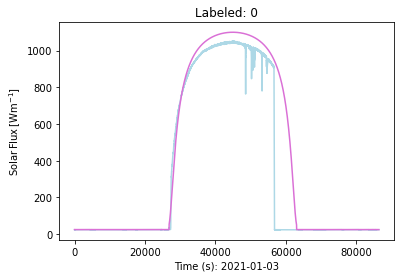

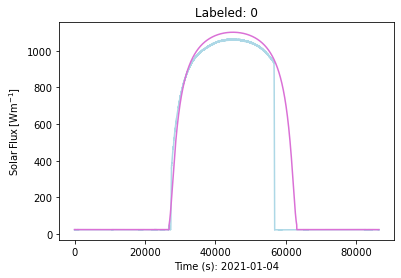

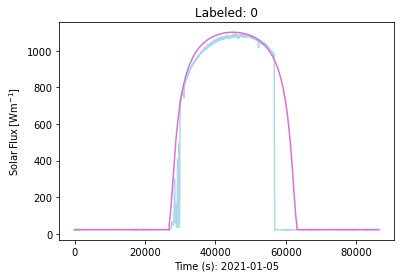

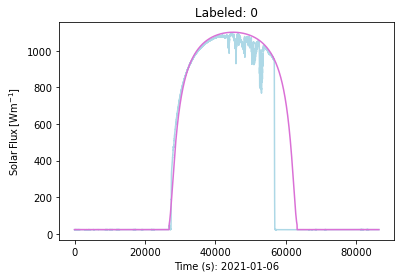

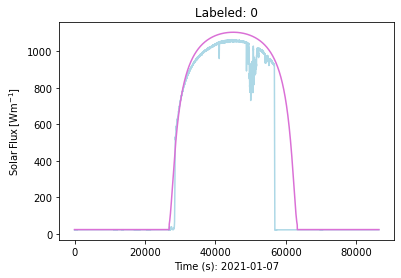

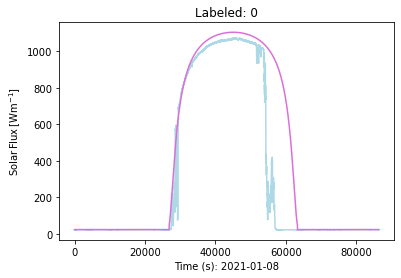

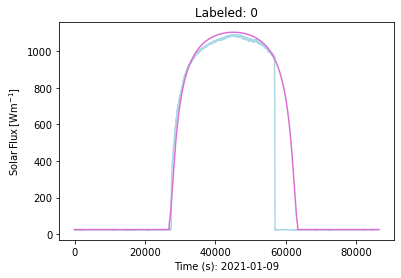

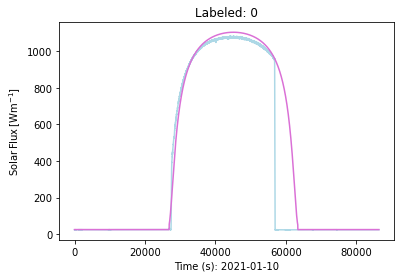

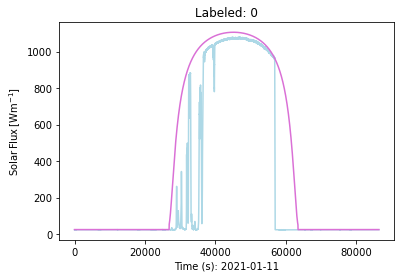

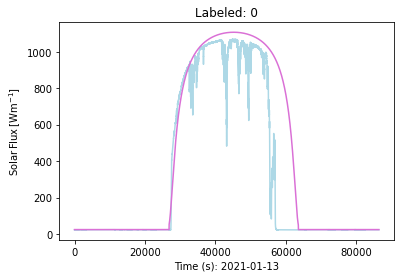

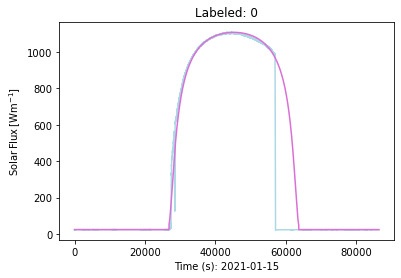

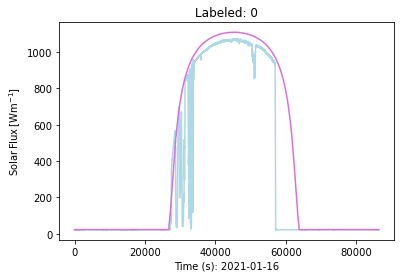

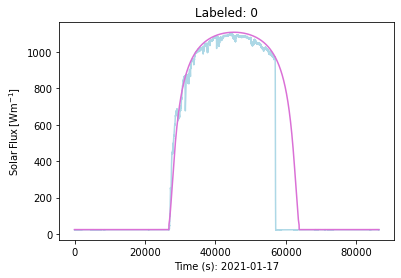

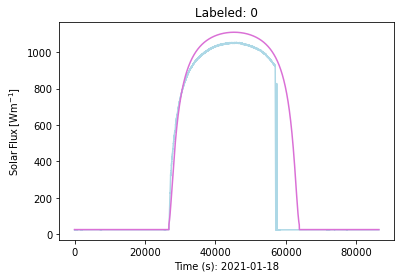

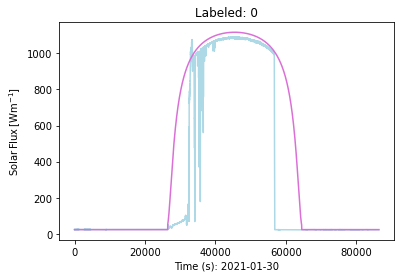

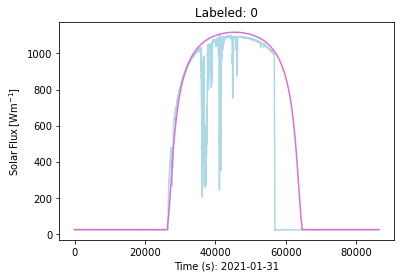

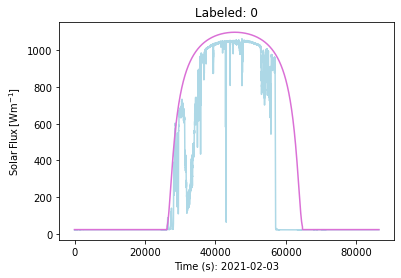

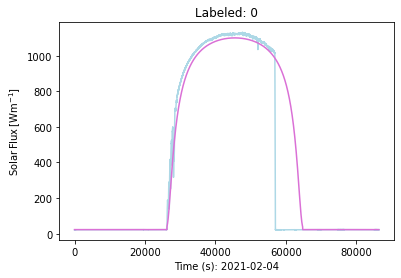

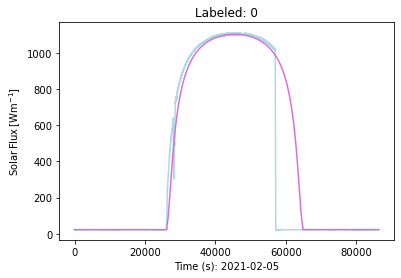

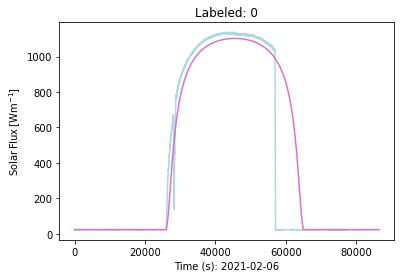

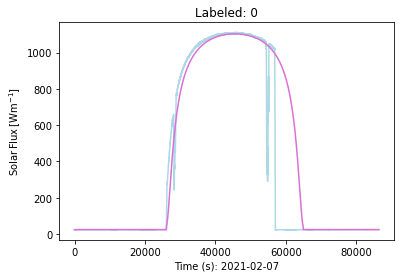

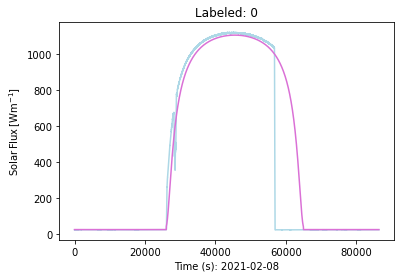

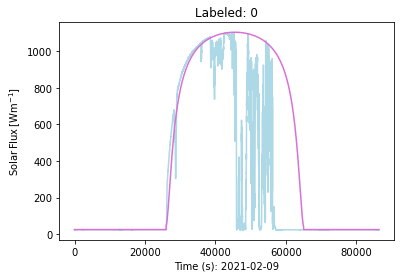

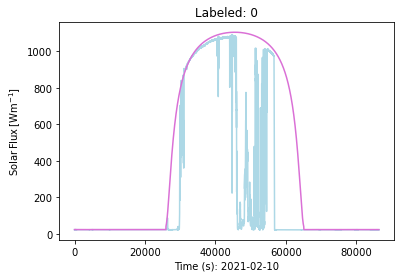

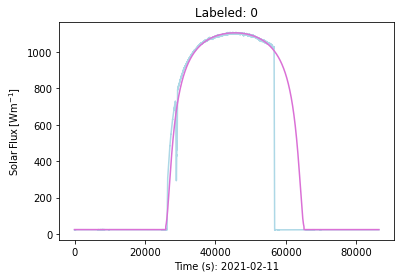

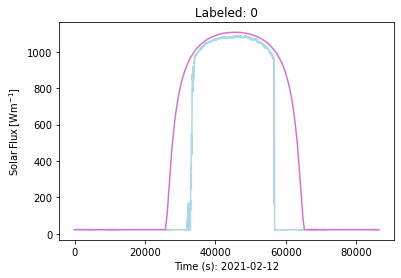

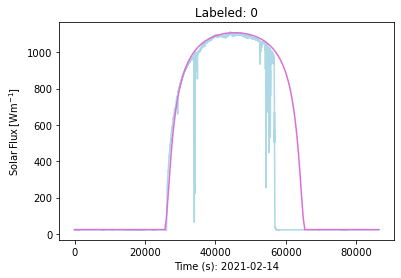

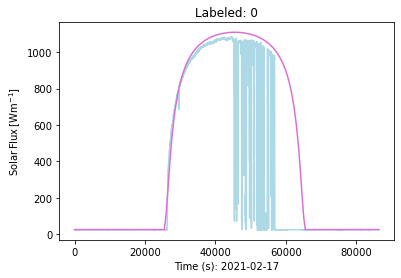

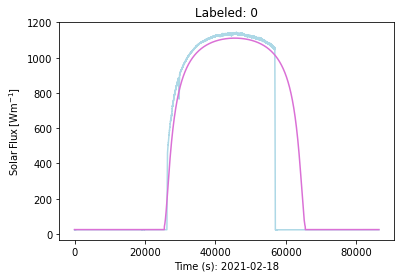

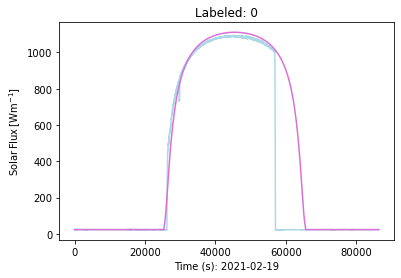

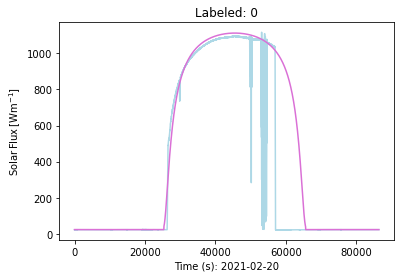

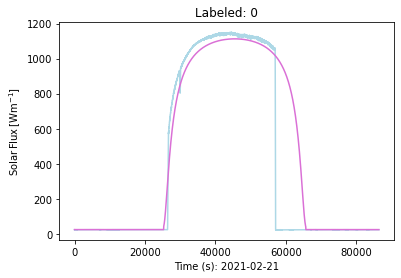

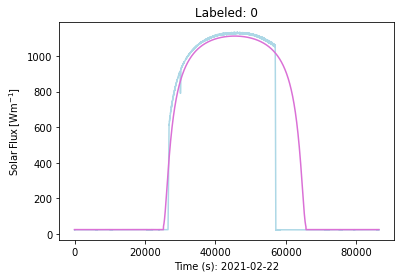

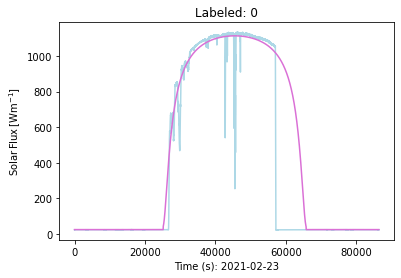

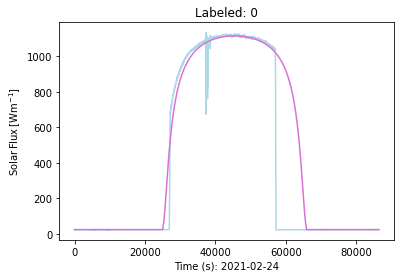

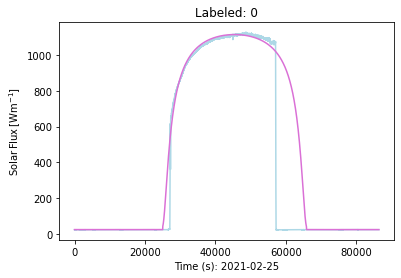

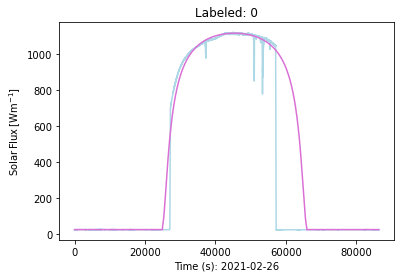

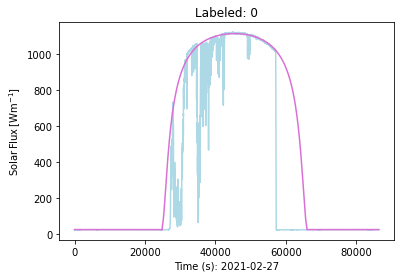

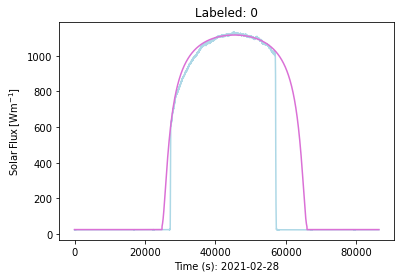

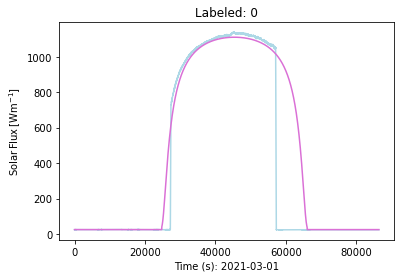

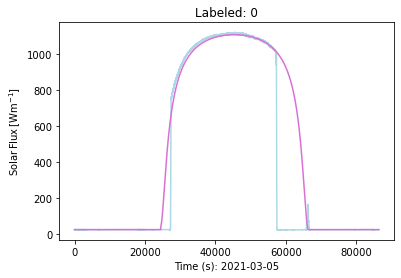

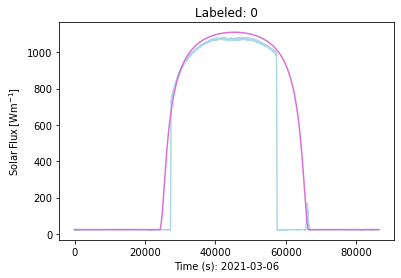

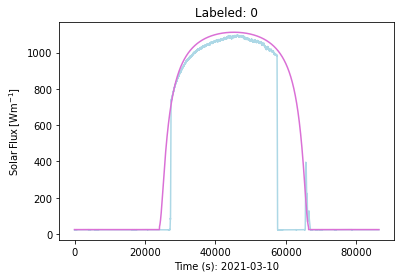

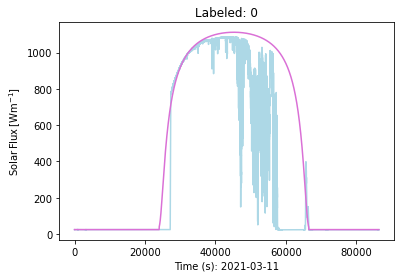

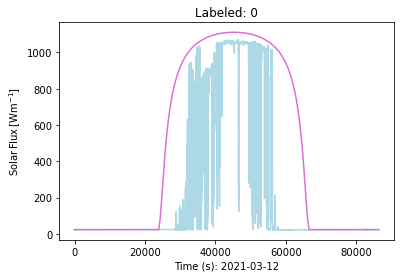

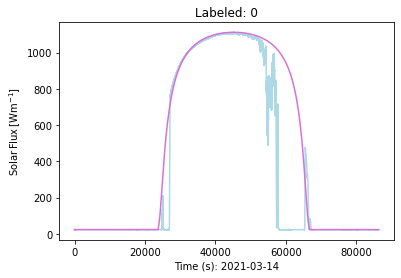

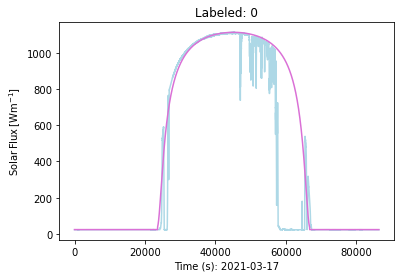

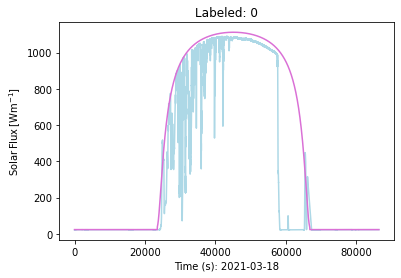

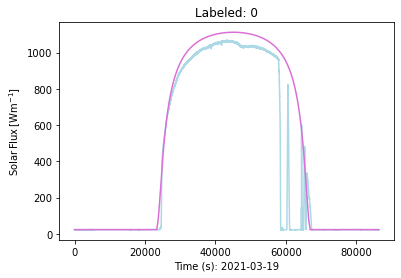

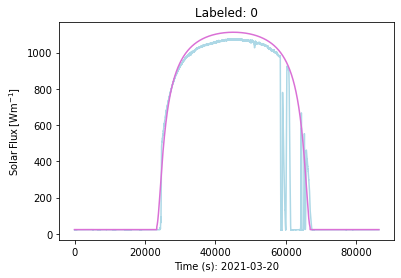

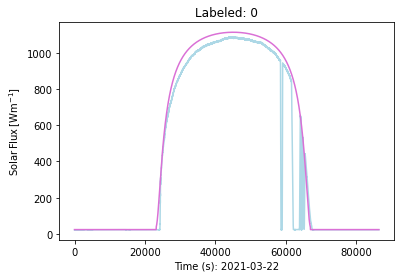

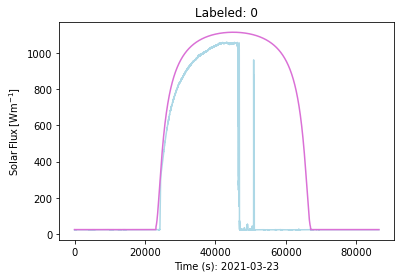

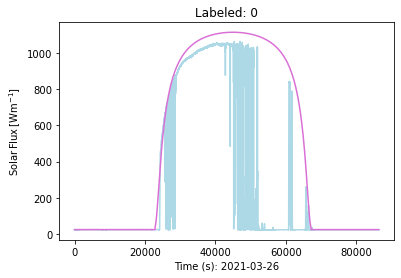

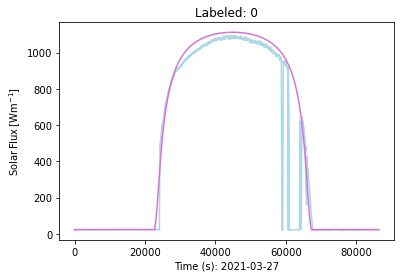

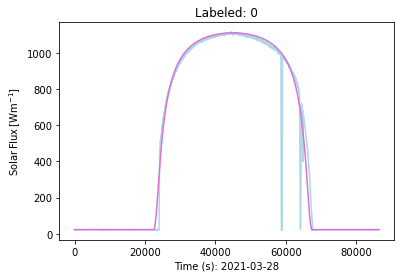

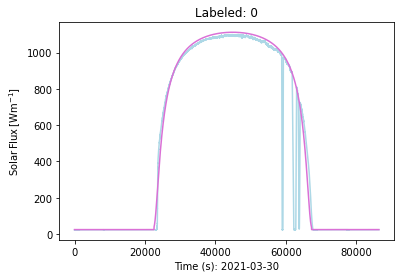

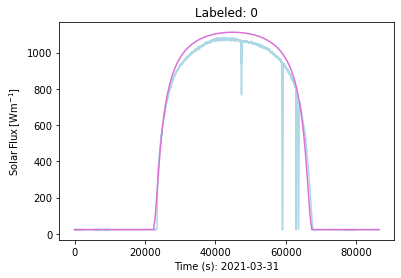

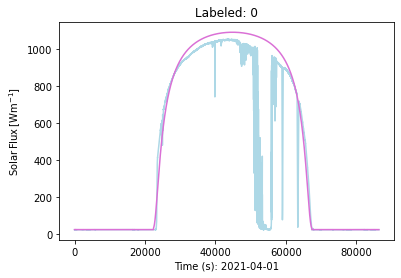

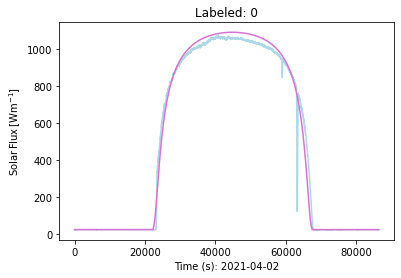

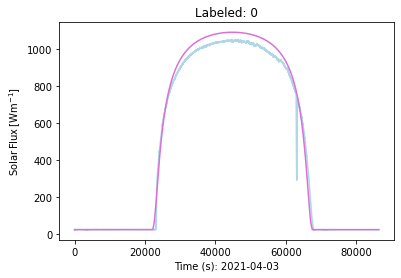

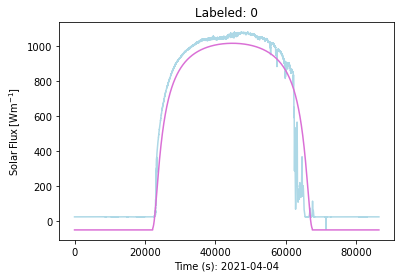

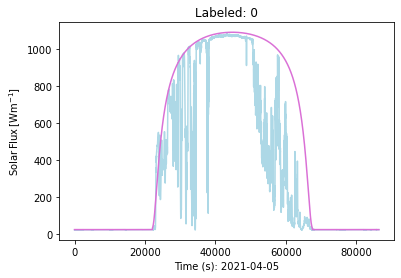

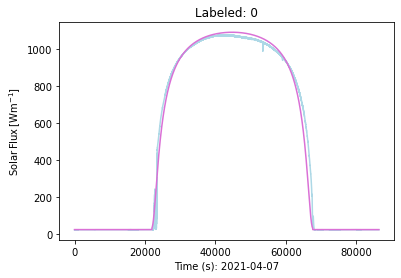

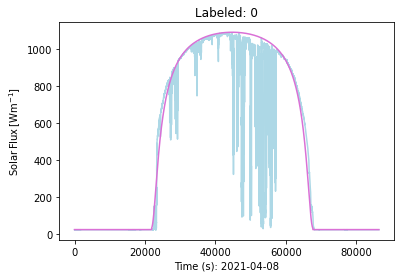

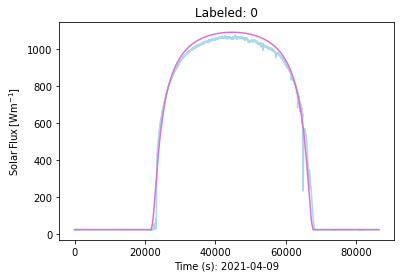

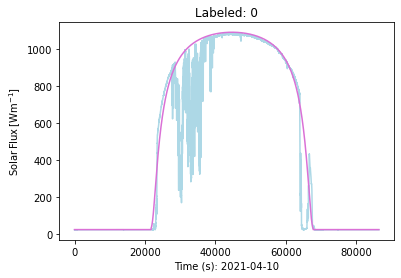

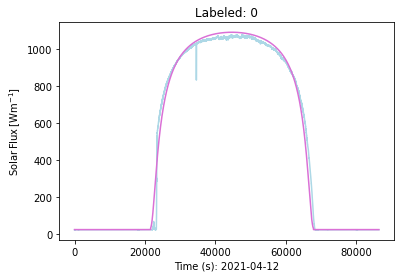

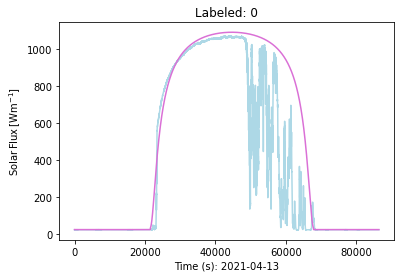

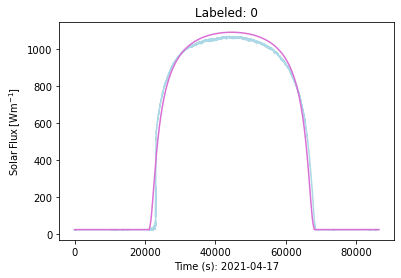

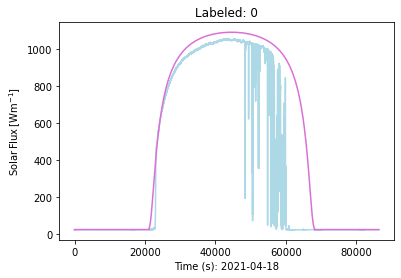

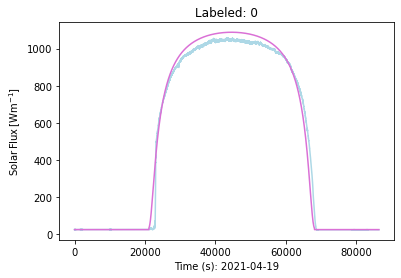

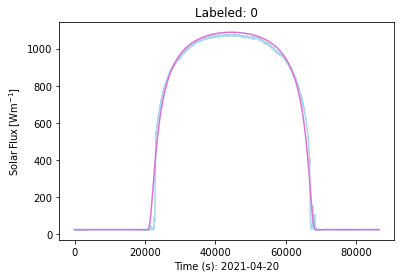

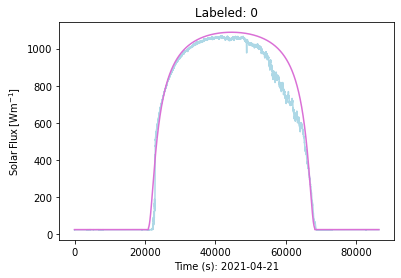

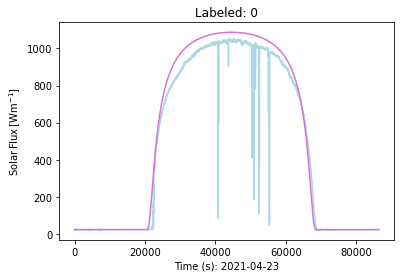

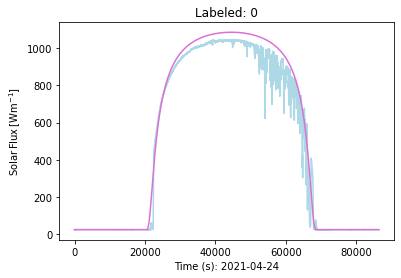

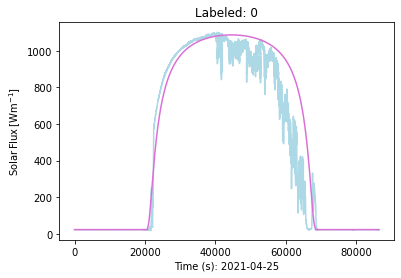

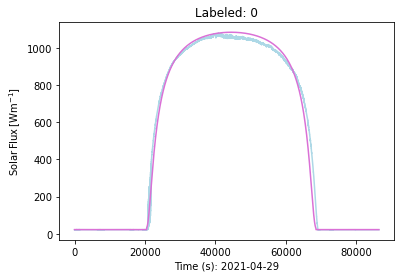

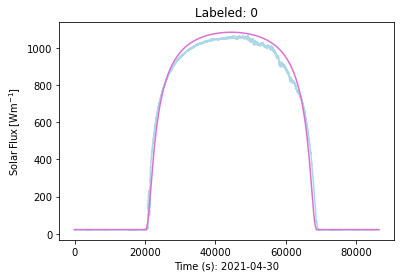

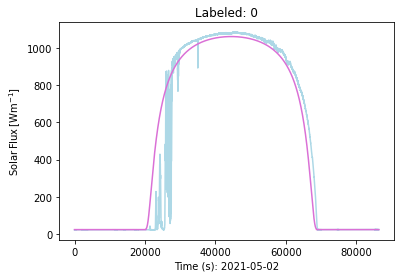

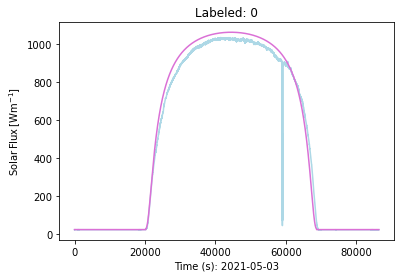

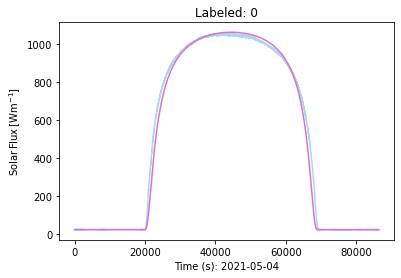

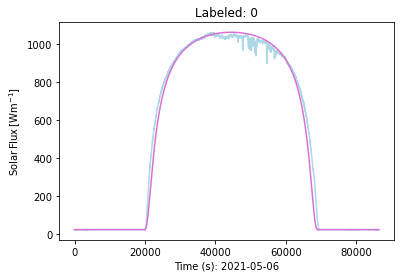

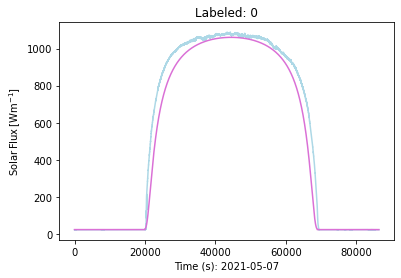

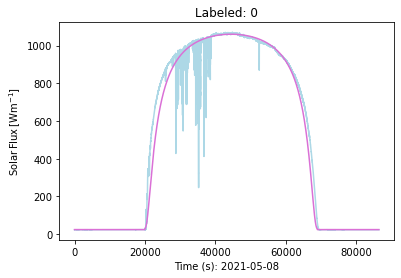

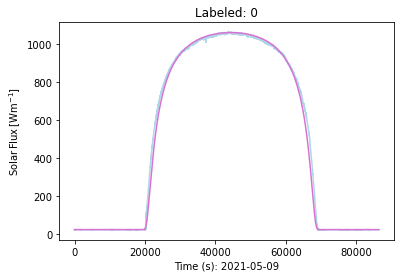

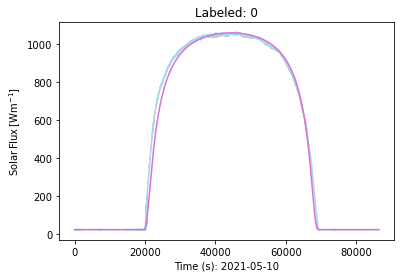

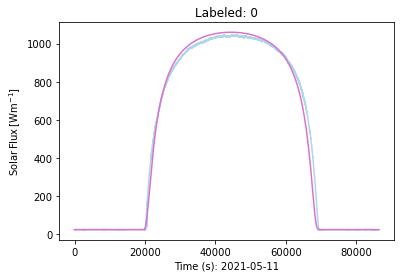

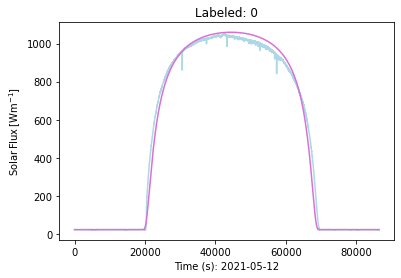

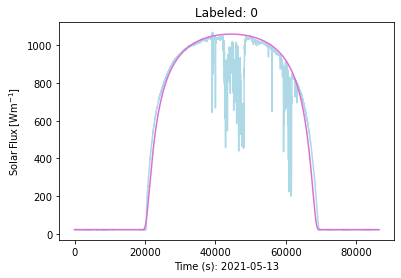

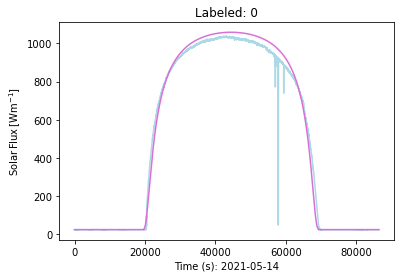

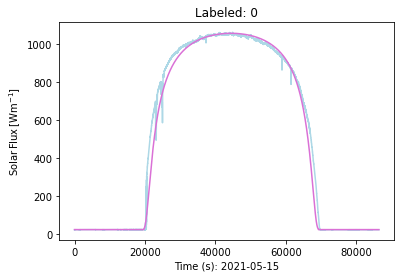

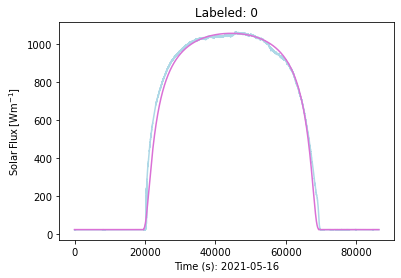

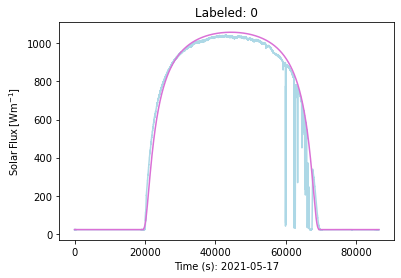

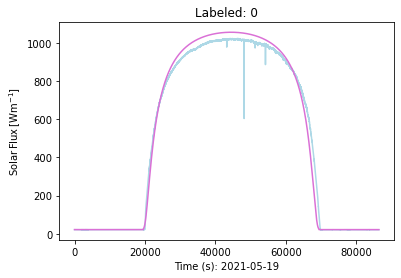

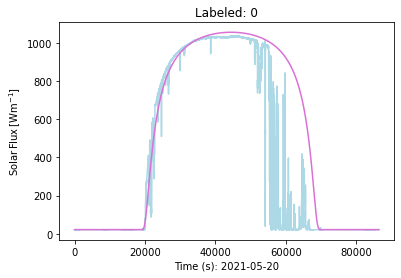

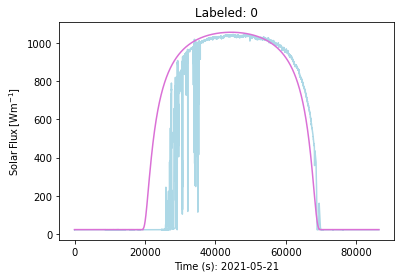

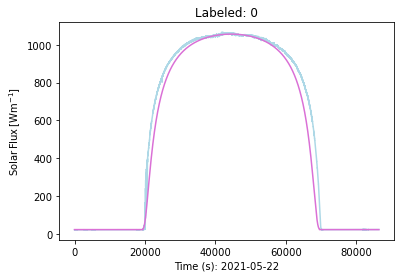

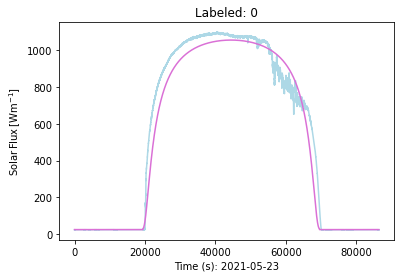

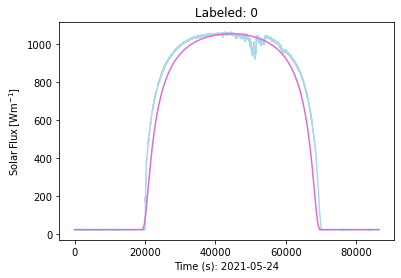

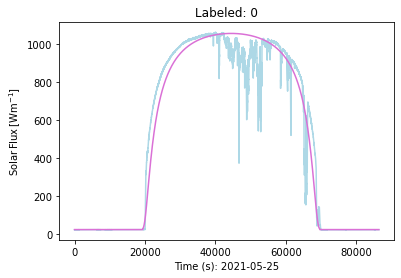

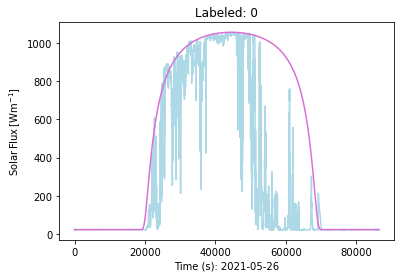

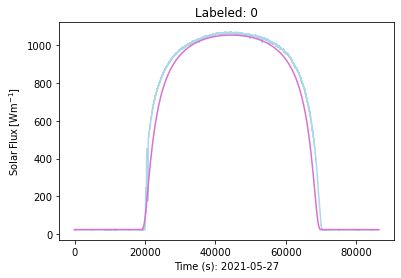

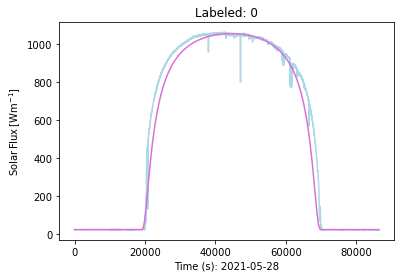

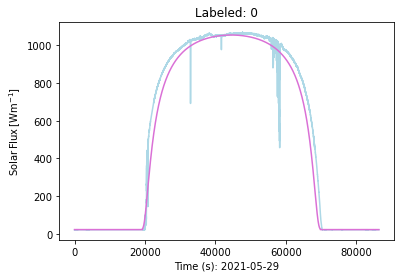

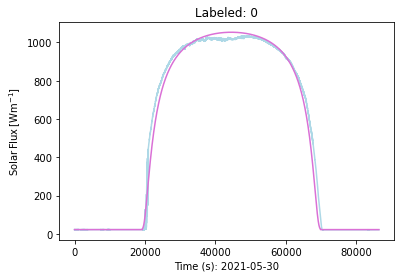

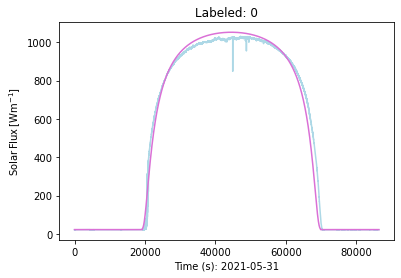

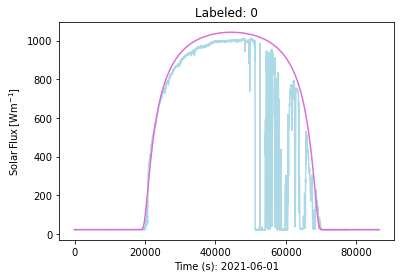

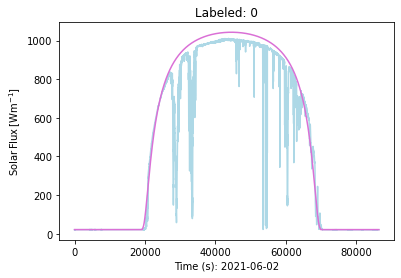

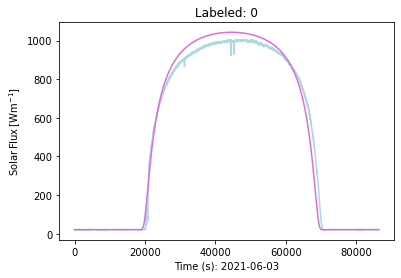

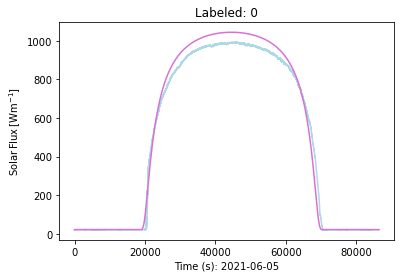

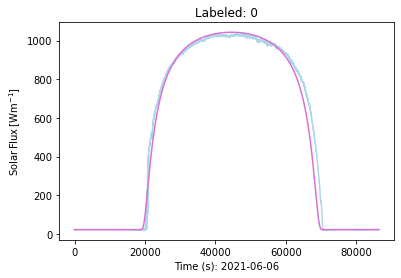

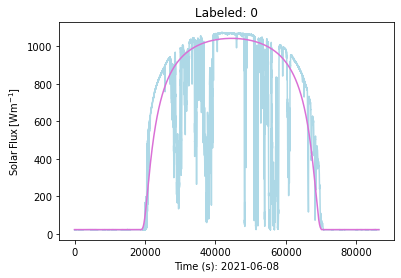

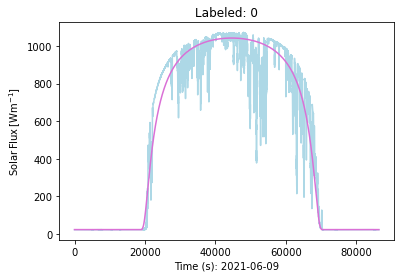

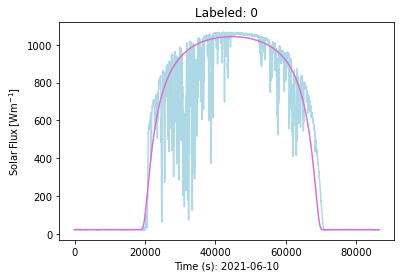

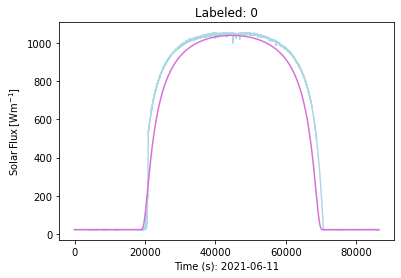

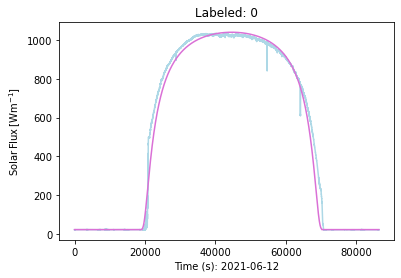

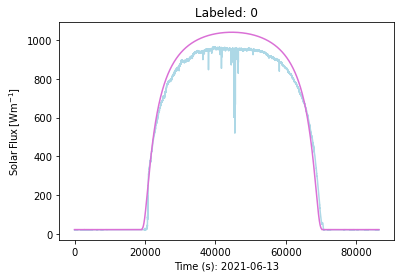

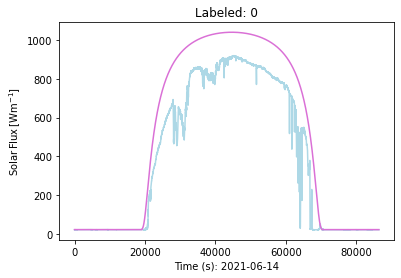

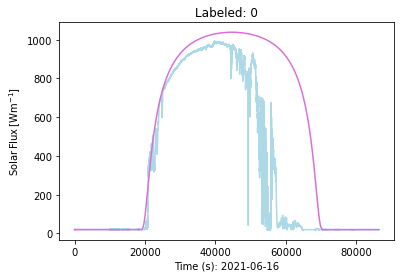

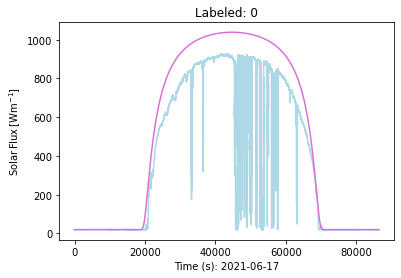

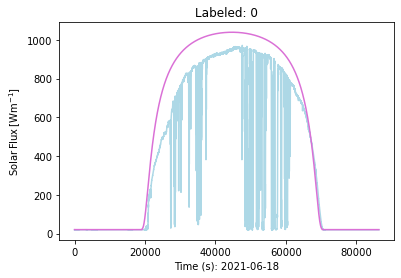

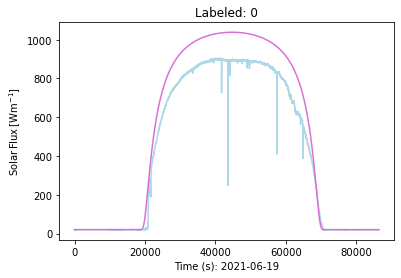

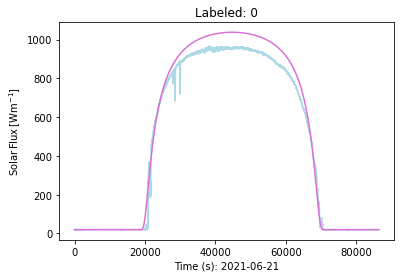

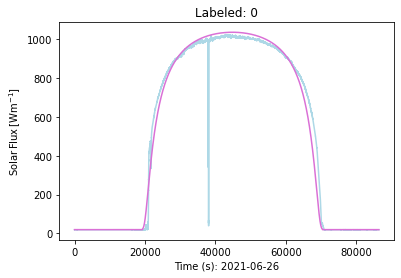

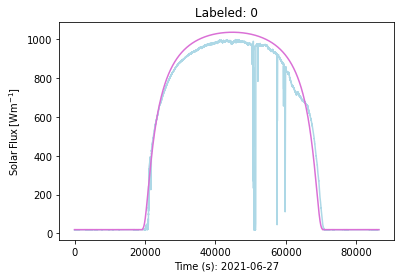

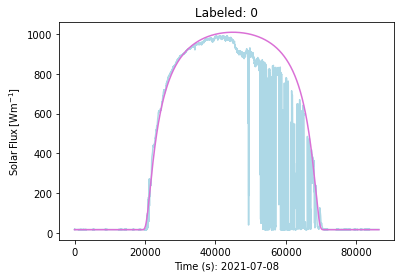

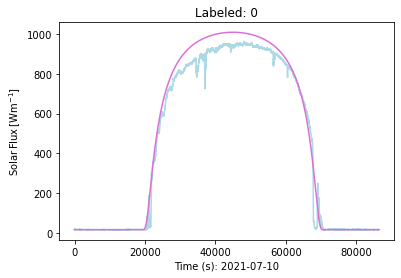

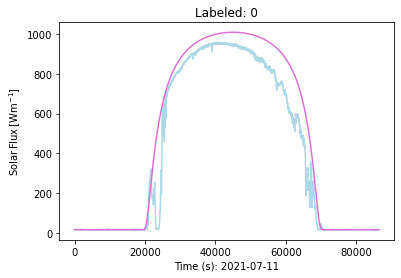

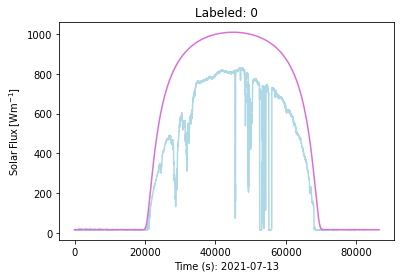

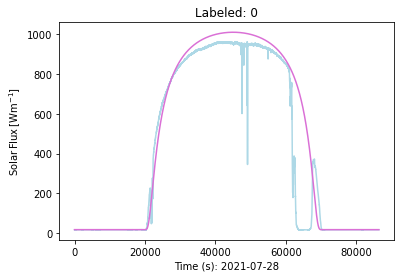

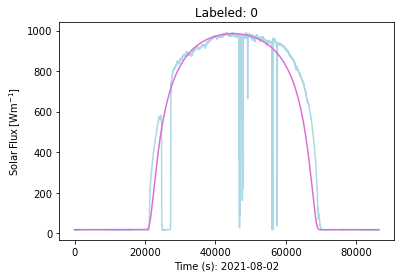

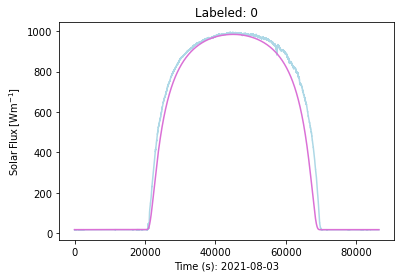

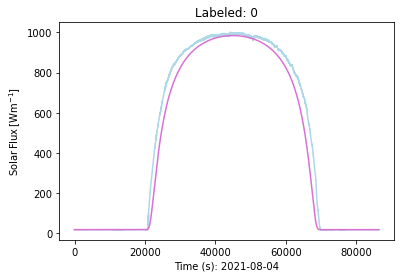

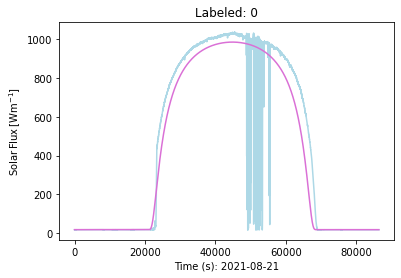

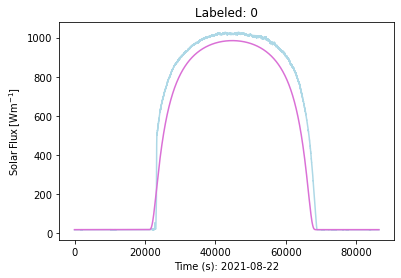

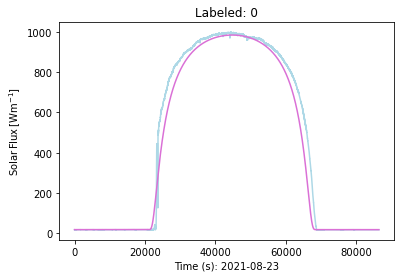

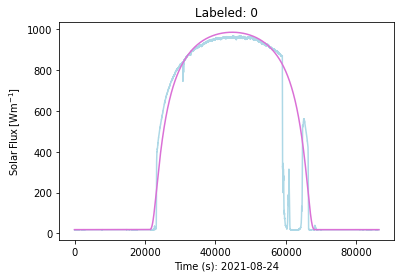

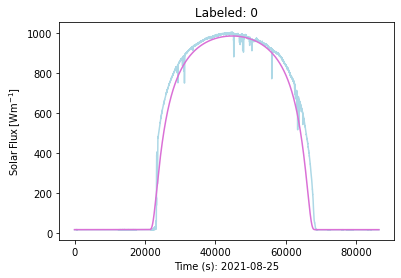

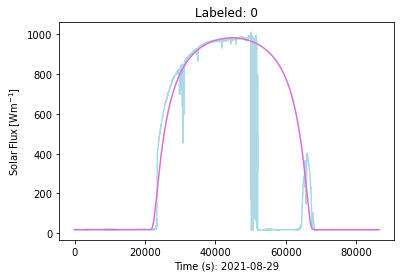

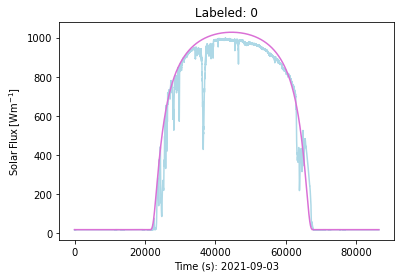

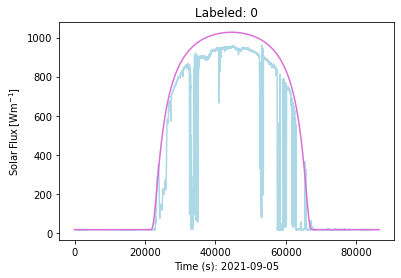

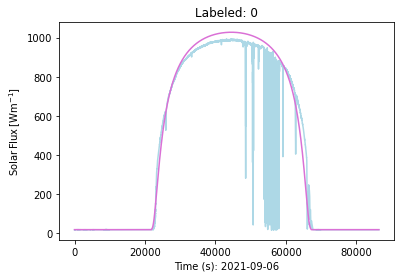

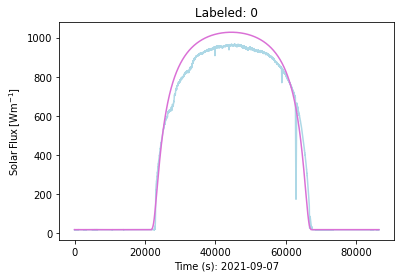

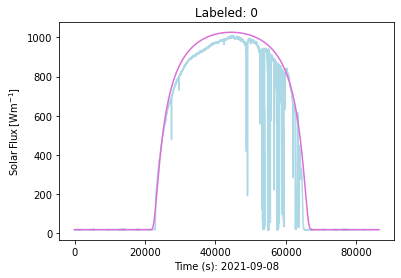

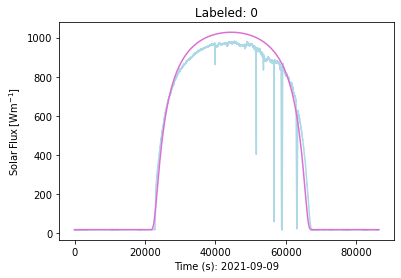

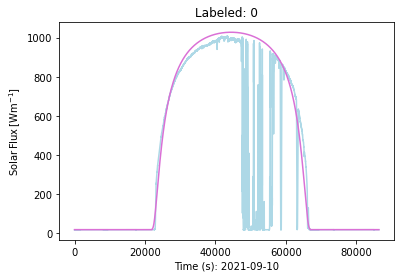

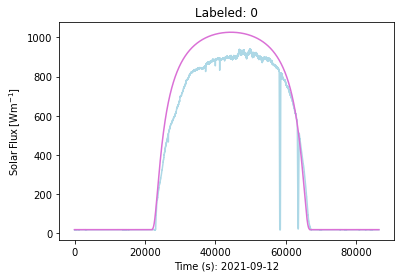

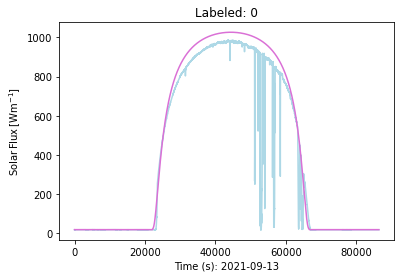

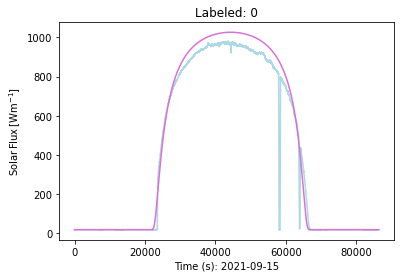

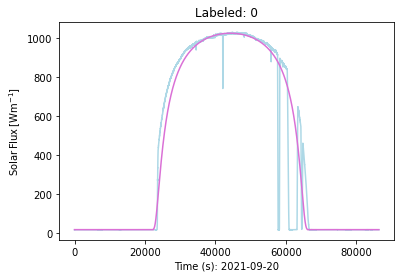

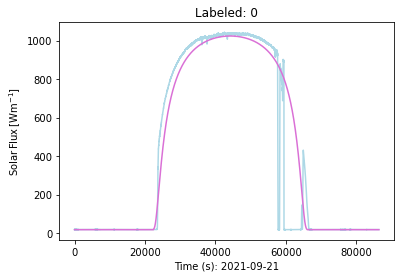

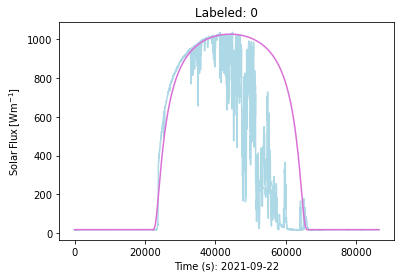

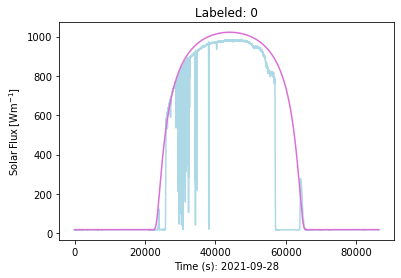

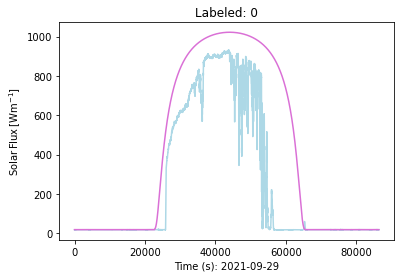

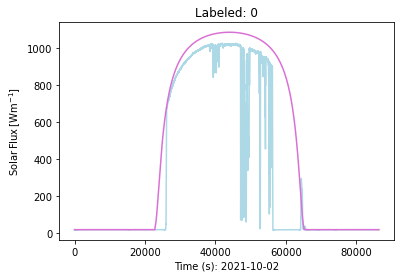

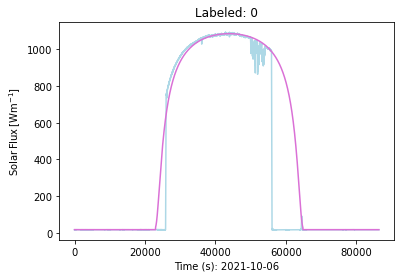

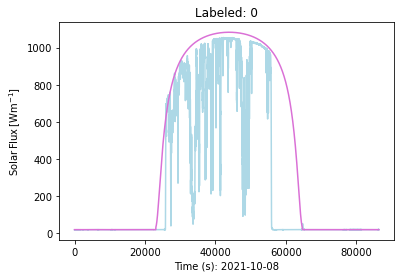

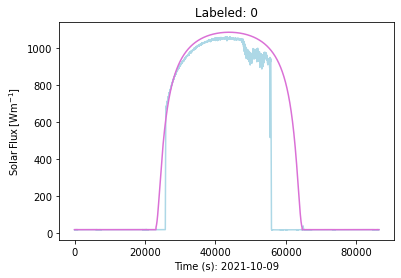

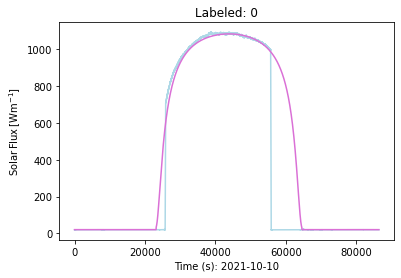

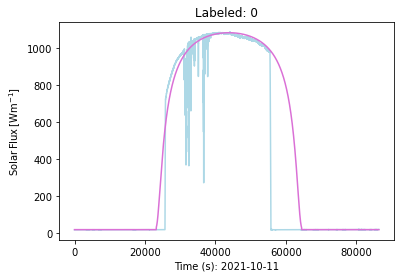

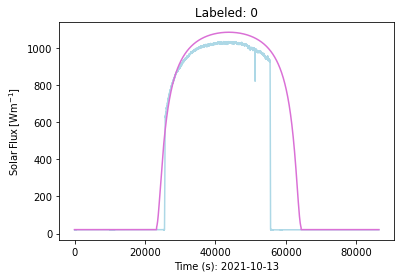

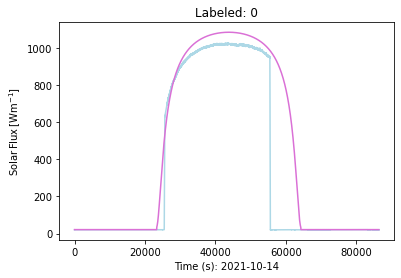

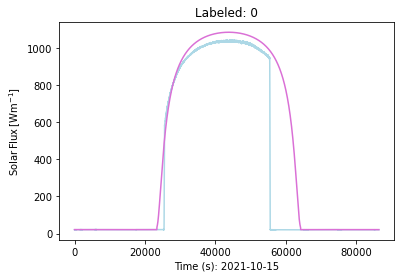

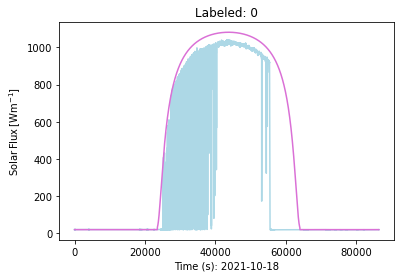

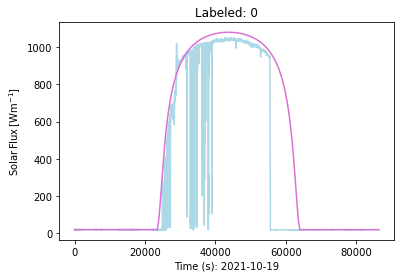

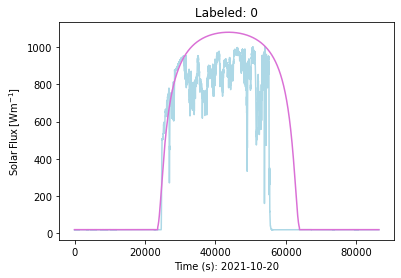

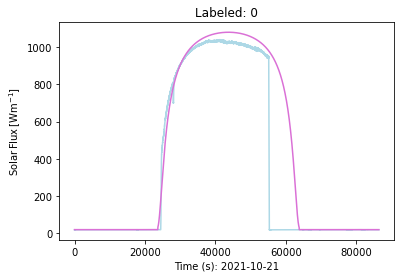

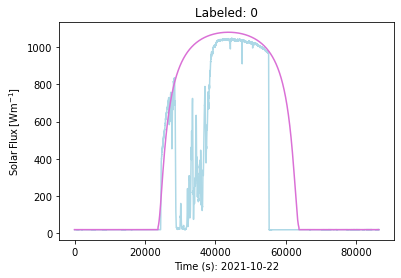

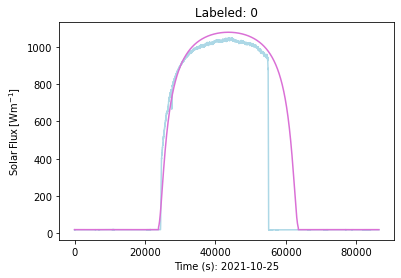

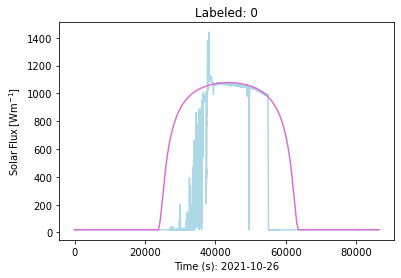

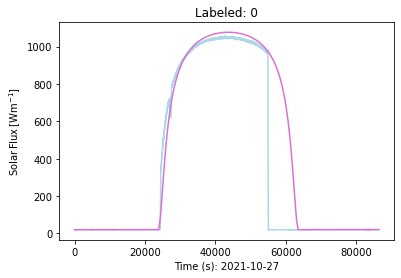

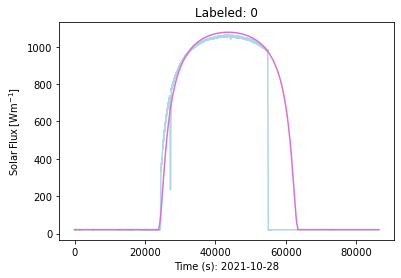

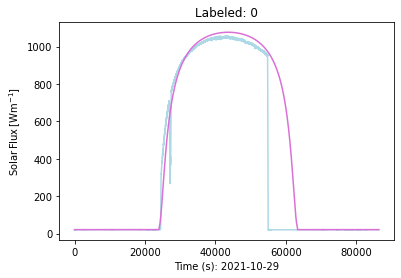

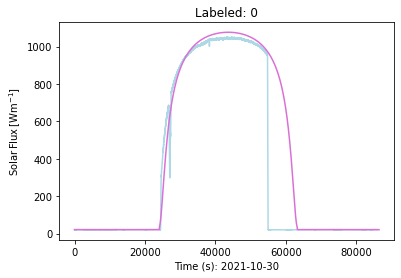

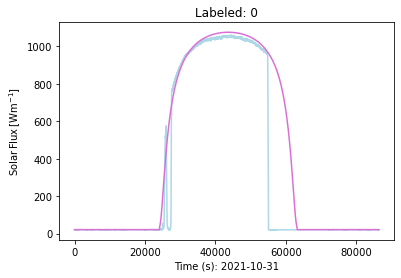

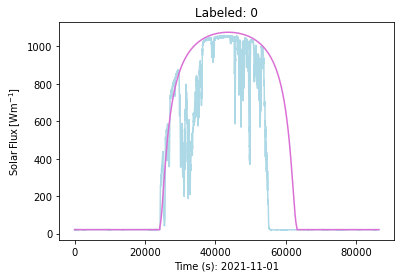

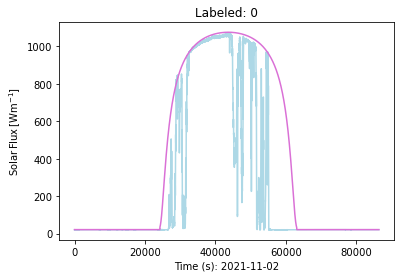

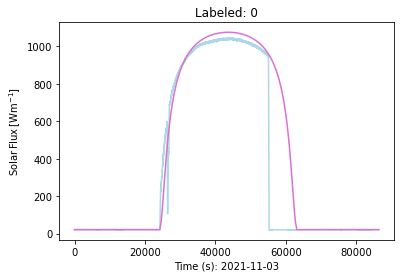

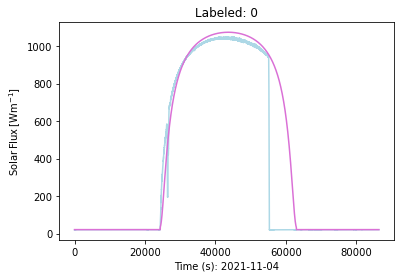

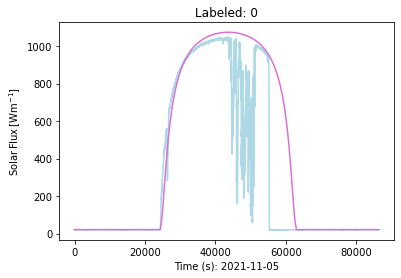

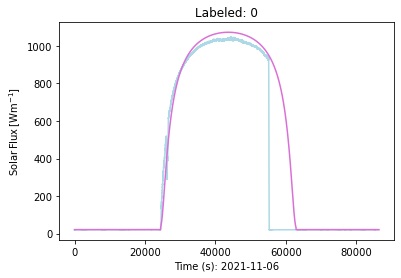

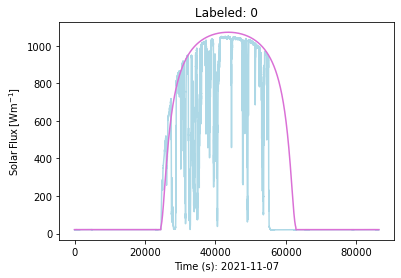

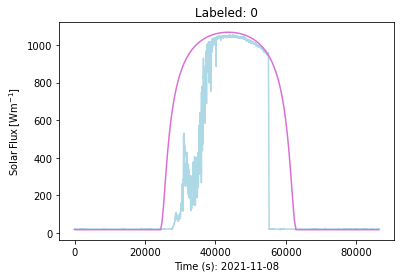

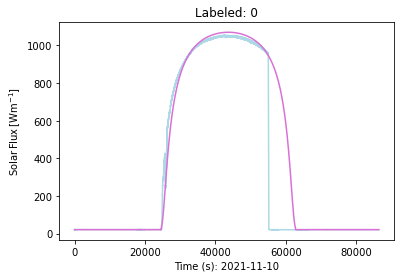

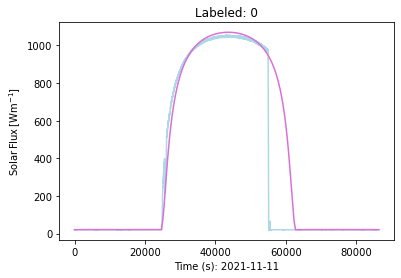

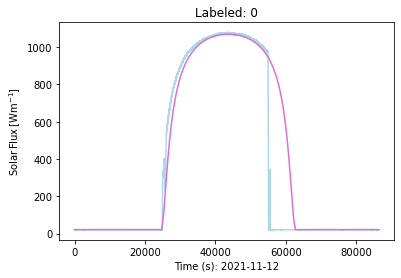

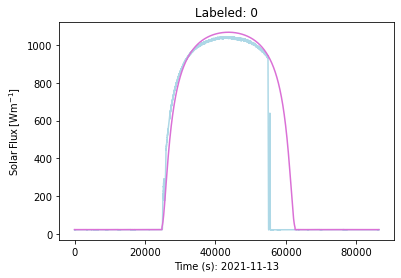

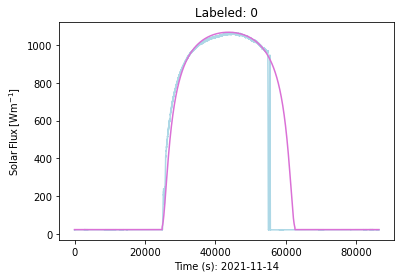

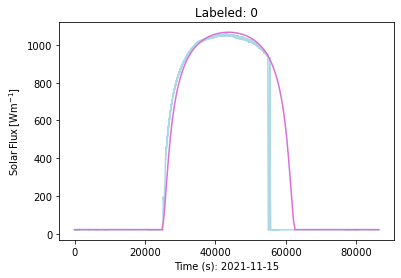

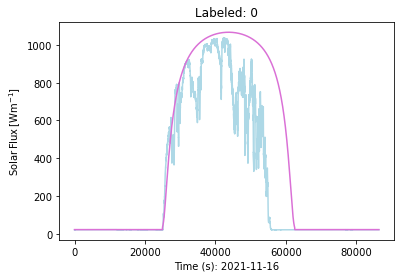

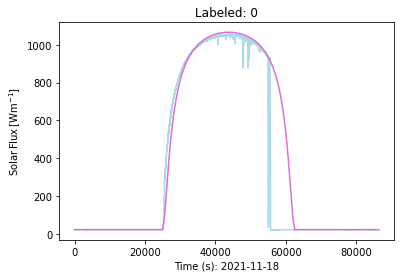

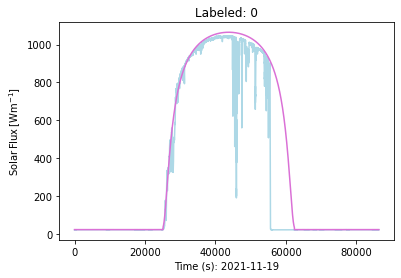

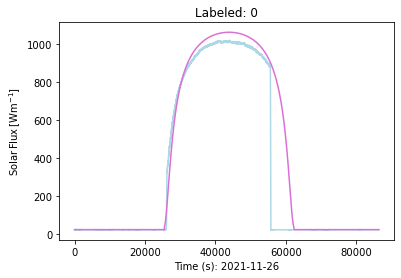

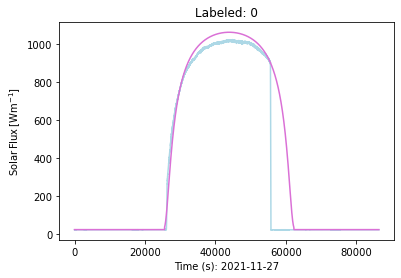

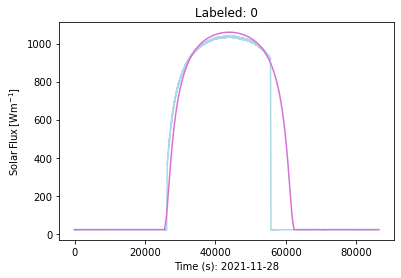

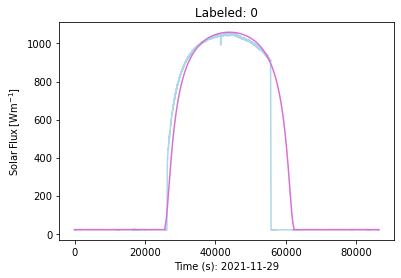

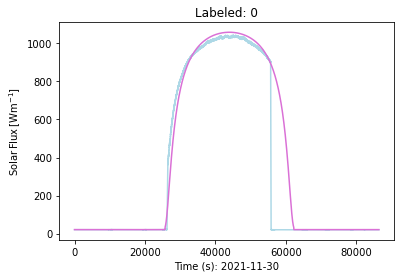

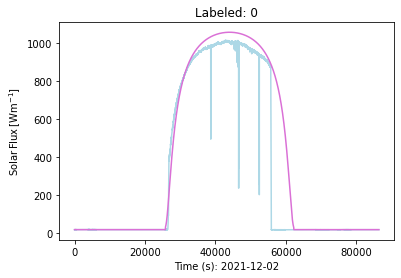

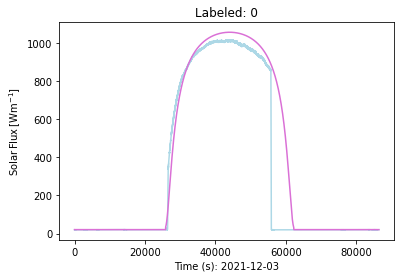

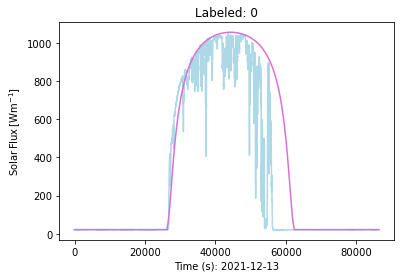

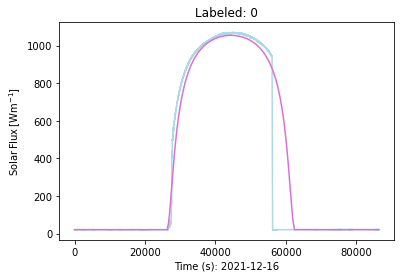

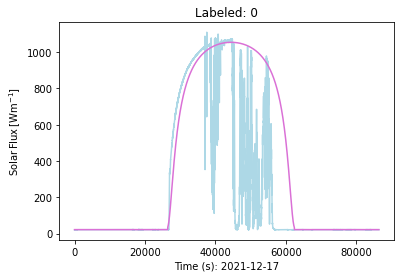

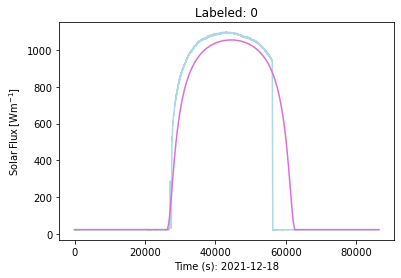

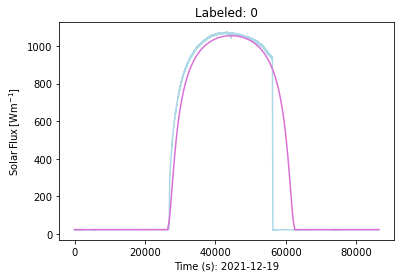

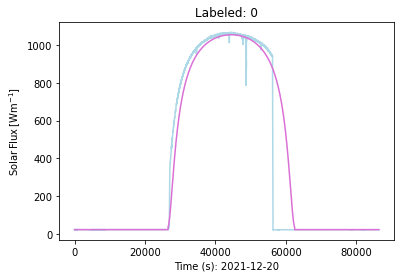

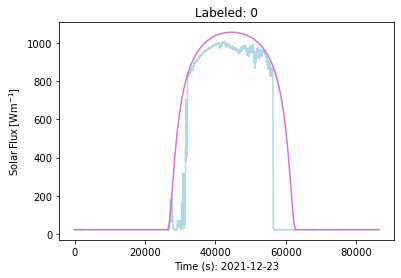

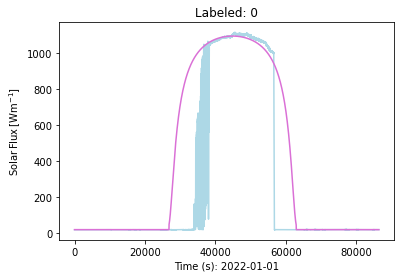

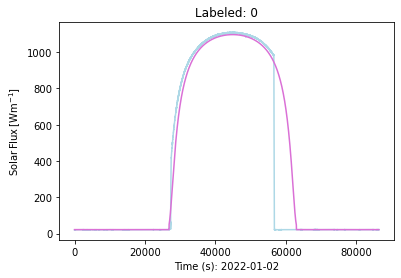

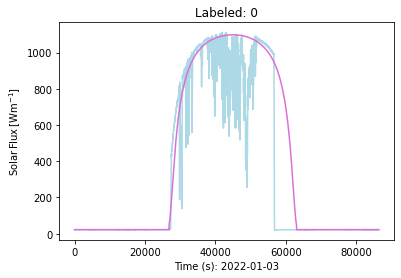

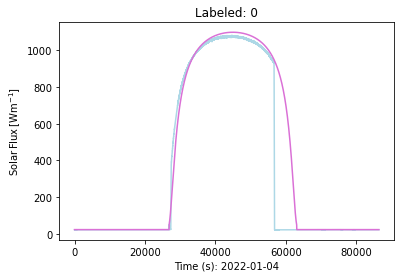

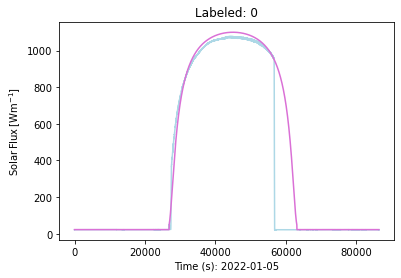

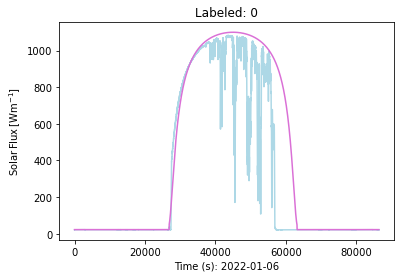

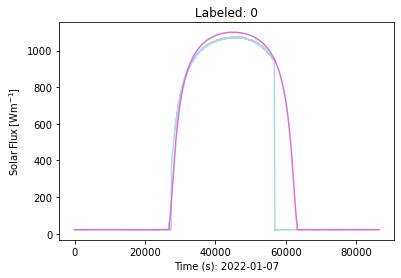

In [29]:
for i, d in enumerate(days):
    if date_labels[i][1] == 0:
        plt.figure(i)
        x = np.arange(0, 86400)
        plt.plot(x, full_flux[i], color='lightblue')
        plt.plot(x, full_model[i]*1.08, color='orchid')
        plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
        plt.xlabel('Time (s): ' + str(d))
        plt.title("Labeled: " + str(date_labels[i][1]))